<a href="https://colab.research.google.com/github/Matsudon6/me/blob/main/predict_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎯 Objectif :
Tu dois prédire le prix d'une maison à partir de ses caractéristiques.
Tu travailleras sur un petit jeu de données simulé.

✅ Tâches à réaliser (à toi de jouer !) :

1.   Prépare les données (imputation + standardisation).
2.   Entraîne un modèle de régression linéaire.
3.   Affiche les coefficients du modèle.
4.   Évalue la performance avec MSE, RMSE, R².
5.   Visualise les valeurs prédites vs les vraies valeurs sur un graphe.

In [95]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Préparation des données
np.random.seed(42)
n = 100
data = {
    'surface': np.random.normal(70, 10, n),
    'nb_pieces': np.random.randint(1, 6, n),
    'age': np.random.normal(20, 5, n)
}

# Nouveau prix avec une vraie relation
prix = (
    3000 * data['surface'] +
    15000 * data['nb_pieces'] -
    800 * data['age'] +
    np.random.normal(0, 10000, n)  # un peu de bruit
)

df = pd.DataFrame(data)
df['prix'] = prix

# Ajout de valeurs manquantes
df.loc[np.random.choice(df.index, 5), 'surface'] = np.nan
df.loc[np.random.choice(df.index, 5), 'age'] = np.nan

df_clean = pd.concat([df, pd.get_dummies(df['nb_pieces'], prefix="num_rooms")], axis=1).drop('nb_pieces', axis=1)
df_clean.head()

# Séparation des jeux de données
X = df_clean.drop('prix', axis=1).values
y = df_clean['prix'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Imputation > NA
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

# Score du modèle
R2 = linreg.score(X_test_scaled, y_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("Les scores du modèle sont : \nR2: {}, RMSE: {}".format(R2, RMSE))

for col, coef in zip(df_clean.columns, linreg.coef_):
  print(col + ": " + str(np.round(coef, 2)))

Les scores du modèle sont : 
R2: 0.8276081401382349, RMSE: 14072.51658039601


surface: 25074.05
age: -2435.34
prix: -10431.73
num_rooms_1: -4879.58
num_rooms_2: 2506.92
num_rooms_3: 7547.35
num_rooms_4: 8636.7


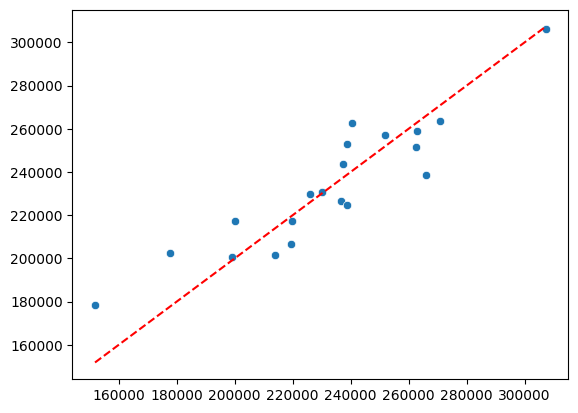

In [115]:
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')